# NetworkX Basics

I referred to this networkx [tutorial](https://networkx.github.io/documentation/stable/tutorial.html) and the [documentation](https://networkx.github.io/documentation/stable/reference/index.html).

In [224]:
import networkx as nx
from networkx.algorithms import bipartite, components
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Building graphs

### Manually

In [225]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(3, 'm') # adding an edge with a new node adds the node automatically to the network
print(G.nodes())
print(G.edges())

[1, 2, 3, 'm']
[(1, 2), (1, 3), (2, 3), (3, 'm')]


### Importing graphs

#### From adjacency lists

In [226]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

##### Getting the adjacency lists from a graph

In [227]:
G2.adj

{0: {1: {}, 2: {}, 3: {}, 5: {}},
 1: {0: {}, 3: {}, 6: {}},
 2: {0: {}},
 3: {0: {}, 1: {}, 4: {}},
 4: {3: {}, 5: {}, 7: {}},
 5: {0: {}, 4: {}, 8: {}},
 6: {1: {}},
 7: {4: {}},
 8: {5: {}, 9: {}},
 9: {8: {}}}

#### From adjacency matrices

In [228]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G3 = nx.Graph(G_mat)
G3.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (4, 5),
 (4, 7),
 (5, 8),
 (8, 9)]

#### From edgelists

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns.

In [229]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])
G4.edges(data=True)

[('0', '1', {'Weight': 4}),
 ('0', '2', {'Weight': 3}),
 ('0', '3', {'Weight': 2}),
 ('0', '5', {'Weight': 6}),
 ('1', '3', {'Weight': 2}),
 ('1', '6', {'Weight': 5}),
 ('3', '4', {'Weight': 3}),
 ('5', '4', {'Weight': 1}),
 ('5', '8', {'Weight': 6}),
 ('4', '7', {'Weight': 2}),
 ('8', '9', {'Weight': 1})]

#### From Pandas DataFrame

Graphs can also be created from pandas dataframes if they are in edge list format.

In [230]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [231]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

Getting the dataframe from a graph.

In [232]:
df = pd.DataFrame(G5.edges(data=True), columns=['n1', 'n2', 'weight'])
df.head()

,n1,n2,weight
0,0,1,{'weight': 4}
1,0,2,{'weight': 3}
2,0,3,{'weight': 2}
3,0,5,{'weight': 6}
4,1,3,{'weight': 2}


Now we can use a lambda to pull out the weight from the last column.

In [233]:
df['weight'] = df['weight'].map(lambda x: x['weight'])
df.head()

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2


### Accessing edges and neighbors

In [234]:
G5[0][1]

{'weight': 4}

### Adding attributes to graphs, nodes, and edges

#### Graph attributes

In [235]:
G = nx.Graph(day = "Friday") # Assign graph attributes when creating a new graph
G.graph

{'day': 'Friday'}

In [236]:
G5.graph['day'] = "Monday" # Or you can modify attributes later
G5.graph

{'day': 'Monday'}

#### Node attributes

In [237]:
G5.add_node(10, time='5pm')
G5.nodes(data = True)

[(0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 (5, {}),
 (6, {}),
 (4, {}),
 (7, {}),
 (8, {}),
 (9, {}),
 (10, {'time': '5pm'})]

#### Edge attributes

In [238]:
G5[0][1]['color'] = "blue"
G5.edges(data = True)

[(0, 1, {'color': 'blue', 'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

### Directed and Multigraphs

Directed and multigraphs can be created using the functions `nx.DiGraph()` and `nx.MultiGraph()`.

### Drawing graphs

NetworkX is not primarily a graph drawing package. Notable examples of dedicated and fully-featured graph visualization tools are [Cytoscape](http://www.cytoscape.org/), [Gephi](https://gephi.org/), [Graphviz](http://www.graphviz.org/) and, for LaTeX typesetting, [PGF/TikZ](https://sourceforge.net/projects/pgf/). To use these and other such tools, you should export your NetworkX graph into a format that can be read by those tools. For example, Cytoscape can read the GraphML format, and so, `networkx.write_graphml(G)` might be an appropriate choice.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

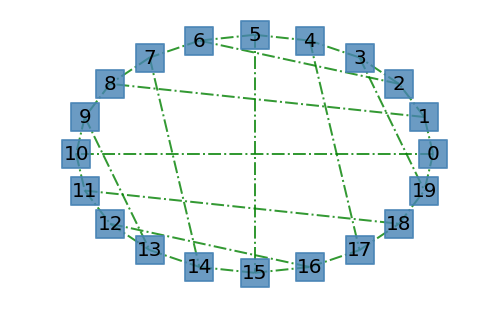

In [239]:
G = nx.dodecahedral_graph()
nx.draw(G, 
        with_labels = True, 
        node_size = 800, # default 300
        node_color = "steelblue", # default "red"
        node_shape = "s", # default "o", must be one of 'so^>v<dph8'
        alpha = 0.8, # transparency, default 1.0
        linewidths = 2, #  Line width of symbol border, default =1.0
        width = 2, # edge width, default 1.0
        edge_color = "green", # default "red"
        style = 'dashdot', # Edge line style (solid|dashed|dotted,dashdot)
        font_size = 20, # default 12
        pos = nx.circular_layout(G) # one of {circular, random, rescale, shell, spectral, spring}_layout
       )

## Bipartite graphs

Bipartite graph is a graph whose nodes can be split into two sets $L$ and $R$ and every edge connects a node in $L$ to a node in $R$.

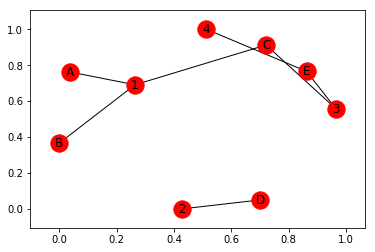

In [240]:
B = nx.Graph() # no separate class for bipartite graphs
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite = 0) # label one set of nodes 0
B.add_nodes_from([1, 2, 3, 4], bipartite = 1) # label the other set of nodes 1
B.add_edges_from([('A',1), ('B',1), ('C',1), ('C',3), ('D',2), ('E',3), ('E',4)])
nx.draw_networkx(B)

### Checking whether a graph is bipartite

In [241]:
bipartite.is_bipartite(B)

True

### Checking if a set of nodes is a bipartition of the graph

In [242]:
bipartite.is_bipartite_node_set(B, set([1, 2, 3]))    # False
bipartite.is_bipartite_node_set(B, set([1, 2, 3, 4])) # True

True

### Identifying the bipartitions

In [243]:
bipartite.sets(B)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

### Projected Graphs

**$L$-Bipartite graph of projections**: Network of nodes in group $L$, where a pair of nodes is connected if they have a common neighbor in $R$ in the bipartite graph.

['A', 'E', 'D', 'B', 'C']
[('A', 'C'), ('A', 'B'), ('E', 'C'), ('B', 'C')]


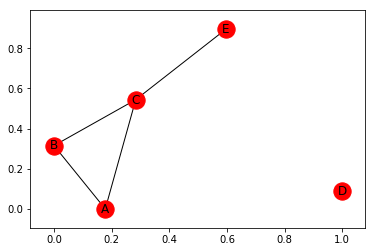

In [244]:
lset = bipartite.sets(B)[0] # get the L-set of nodes
lproject = bipartite.projected_graph(B, lset) # build the projected graph
print(lproject.nodes())
print(lproject.edges())
nx.draw_networkx(lproject)

We can add weights to the nodes of these graphs depending on the number of nodes they have in common from the R-set of nodes.

In [245]:
lproject = bipartite.weighted_projected_graph(B, lset) # build the weighted projected graph
lproject.edges(data=True)

[('A', 'C', {'weight': 1}),
 ('A', 'B', {'weight': 1}),
 ('E', 'C', {'weight': 1}),
 ('B', 'C', {'weight': 1})]

## Algorithms

### Clustering

#### Local Clustering Coefficient
Local clustering coefficient of a node is the fraction of pairs of the node's neighbors that are connected with each other. This tells us the fraction of all the possible neighbors of a node that are actually connected with each other.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

0.16666666666666666

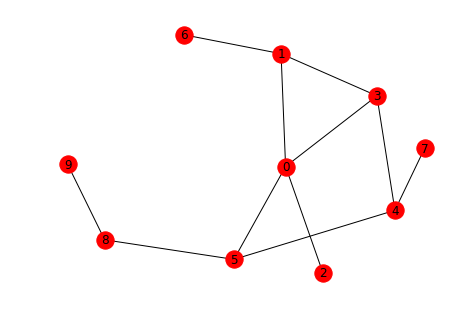

In [246]:
nx.draw(G4, with_labels = True)
G4.nodes()
nx.clustering(G4, '0')

If the node only has one neighbor then the local clustering coefficient is 0 by definition.

In [247]:
nx.clustering(G4, '9')

0.0

#### Global clustering coefficient
- Approach 1: Take the mean of the local clustering coefficients for all the nodes in the graph.
- Approach 2: Percentage of "open triads" that are triangles. This is called **transitivity**. A triangle contains three open triads.

Both measure the tendency for edges to form triangles. Transitivity weights nodes with higher degree higher.

In [248]:
nx.average_clustering(G4) # approach 1

0.08333333333333333

In [249]:
nx.transitivity(G4) # approach 2: transitivity

0.15789473684210525

### Average neighborhood degree of a node

The average neighborhood degree of node $i$ is given by

$$k_{nn,i} = \frac{1}{\mid N(i) \mid}\sum_{j \in N(i)}k_j$$

where $N(i)$ are the neighbors of the node $i$ and $k_j$ is the degree of the node $j$. For weighted graphs, this becomes

$$k_{nn,i}^w = \frac{1}{s_i}\sum_{j \in N(i)}w_{ij}k_j$$

where s_i is the weighted degree of node $i$ and $w_{ij}$ is the weight of the edge that links $i$ and $j$.

In [250]:
nx.average_neighbor_degree(G4) # calculates avegrage degree for all nodes in the graph

{'0': 2.5,
 '1': 2.6666666666666665,
 '2': 4.0,
 '3': 3.3333333333333335,
 '4': 2.3333333333333335,
 '5': 3.0,
 '6': 3.0,
 '7': 3.0,
 '8': 2.0,
 '9': 2.0}

### Distance Measures

#### Shortest Paths

In [251]:
nx.shortest_path_length(G4, "6", "9") # shortest path length from node 6 to 9

5

In [252]:
nx.shortest_path(G4, "6", "9") # nodes in the shortest path from node 6 to 9

['6', '1', '0', '5', '8', '9']

In [253]:
nx.average_shortest_path_length(G4) # mean of all shortest path lengths between all the nodes

2.4

#### Breadth First Search

Finding the shortest distance of s node from all the other nodes using breadth first search.

In [254]:
bfs = nx.bfs_tree(G4, "6") 
nx.shortest_path_length(bfs, '6') # distance of node 6 from all the other nodes using Breadth First Search

{'0': 2,
 '1': 1,
 '2': 3,
 '3': 2,
 '4': 3,
 '5': 3,
 '6': 0,
 '7': 4,
 '8': 4,
 '9': 5}

#### Diameter

In [255]:
nx.diameter(G4)

5

### Components

In [256]:
print(components.is_connected(G4)) # True
G4.add_edge(10,11) # adding another component to the graph
print(components.is_connected(G4)) # False

True
False


In [257]:
components.number_connected_components(G4)

2

In [258]:
comp = components.connected_components(G4) # just the nodes
list(comp)

[{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}, {10, 11}]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

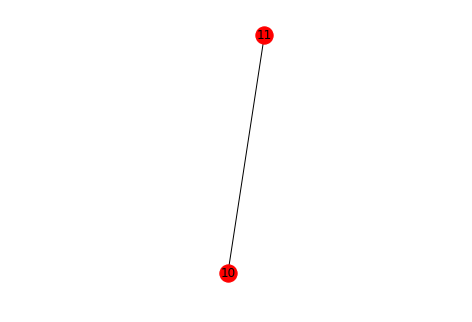

In [259]:
comp = components.connected_component_subgraphs(G4) # individual subgraph objects
nx.draw(list(comp)[1], with_labels = True)

In [260]:
components.node_connected_component(G4, 10) # nodes in the component containing node 10

{10, 11}

#### Disconnecting a graph

Find a node whose removal renders the graph disconnected. **Robust networks** are those which have large minimum node and edge cuts.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

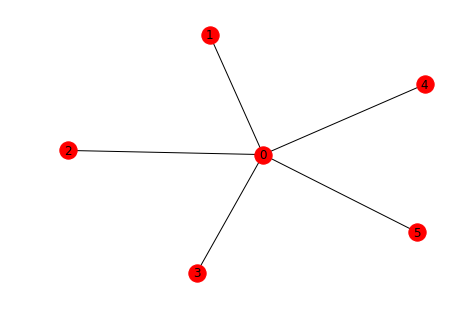

In [261]:
G_un = nx.Graph()
G_un.add_edges_from([(1,0), (2,0), (3,0), (4,0), (5,0)])
nx.draw(G_un, with_labels = True)

##### What is the smallest number of nodes that can be removed to make it disconnected?

In [262]:
nx.node_connectivity(G_un)

1

##### Which nodes are those?

In [263]:
nx.minimum_node_cut(G_un)

{0}

##### What is the smallest number of edges that can be removed to make it disconnected?

In [264]:
nx.edge_connectivity(G_un)

1

##### Which edges are those?

In [265]:
nx.minimum_edge_cut(G_un) # might not be unique

{(0, 5)}